/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_96115/1178568570.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Value
Date             
2024-03-31  23.76
2024-03-30  25.03
2024-03-29  29.08
2024-03-28  37.89
2024-03-27  39.82


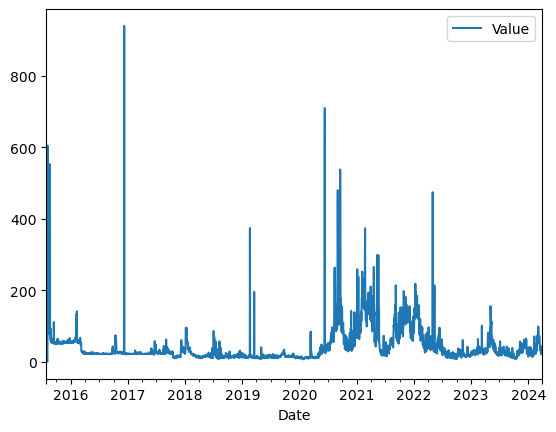

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
 return datetime.strptime(x,'%Y-%m-%d')
 
series = read_csv('Dataset.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

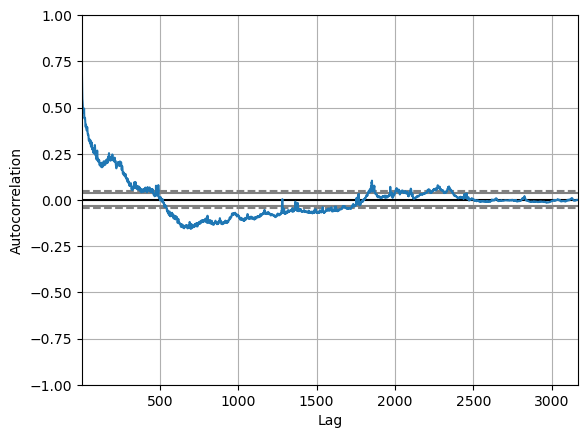

In [2]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_96115/4081789220.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 3168
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -15885.096
Date:                Mon, 01 Apr 2024   AIC                          31782.193
Time:                        15:27:39   BIC                          31818.556
Sample:                             0   HQIC                         31795.236
                               - 3168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5188      0.003   -193.871      0.000      -0.524      -0.514
ar.L2         -0.3726      0.004    -88.976      0.000      -0.381      -0.364
ar.L3         -0.2374      0.007    -36.425      0.0

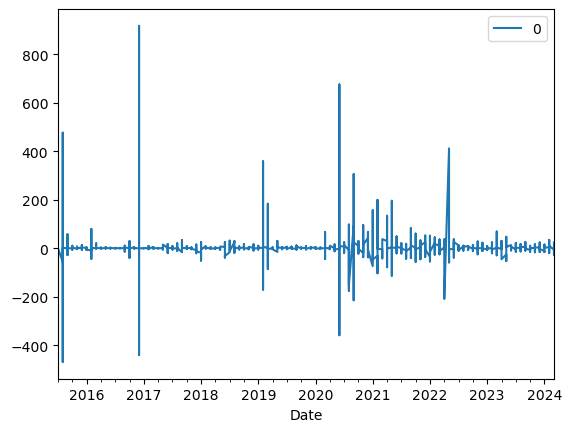

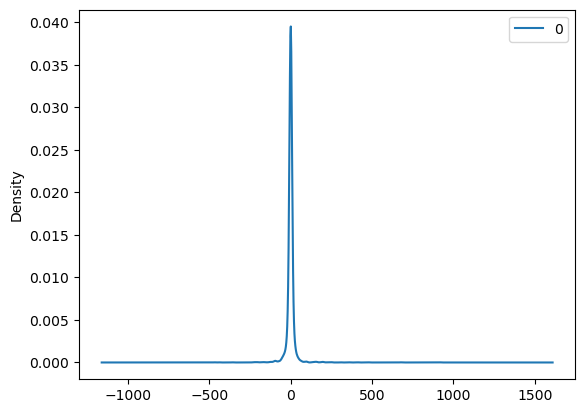

                 0
count  3168.000000
mean     -0.011177
std      36.484059
min    -469.094379
25%      -2.888939
50%      -0.188732
75%       2.396642
max     916.683488


In [3]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_96115/3199716350.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=32.578195, expected=19.050000
predicted=23.353999, expected=21.320000
predicted=26.915986, expected=25.830000
predicted=30.026543, expected=35.590000
predicted=31.906136, expected=60.240000
predicted=49.024431, expected=70.210000
predicted=55.172896, expected=48.720000
predicted=44.360893, expected=59.080000
predicted=56.055218, expected=82.060000
predicted=71.090395, expected=86.350000
predicted=76.184656, expected=59.840000
predicted=63.111906, expected=34.210000
predicted=45.924241, expected=12.120000
predicted=30.345807, expected=11.700000
predicted=28.629945, expected=12.450000
predicted=24.894215, expected=12.010000
predicted=18.789772, expected=15.640000
predicted=17.683609, expected=16.160000
predicted=14.783188, expected=14.030000
predicted=13.646794, expected=38.880000
predicted=31.137507, expected=13.050000
predicted=12.509969, expected=13.470000
predicted=16.854687, expected=14.430000
predicted=16.697272, expected=11.820000
predicted=12.337375, expected=11.230000


predicted=30.975720, expected=29.120000
predicted=32.530119, expected=35.300000
predicted=35.363576, expected=35.430000
predicted=34.852171, expected=41.790000
predicted=39.052432, expected=38.630000
predicted=36.279820, expected=38.370000
predicted=37.199801, expected=35.270000
predicted=36.151986, expected=43.570000
predicted=41.617055, expected=55.560000
predicted=50.063175, expected=61.100000
predicted=53.745561, expected=59.660000
predicted=54.714031, expected=42.120000
predicted=44.045636, expected=30.920000
predicted=38.418491, expected=21.960000
predicted=32.128977, expected=14.070000
predicted=24.927284, expected=13.180000
predicted=22.321676, expected=14.560000
predicted=19.087377, expected=16.350000
predicted=17.889816, expected=17.500000
predicted=17.443286, expected=16.780000
predicted=16.131296, expected=15.540000
predicted=15.472044, expected=14.950000
predicted=15.316227, expected=12.890000
predicted=13.969154, expected=15.460000
predicted=15.773214, expected=15.990000


predicted=24.840157, expected=22.630000
predicted=22.827766, expected=23.510000
predicted=23.191072, expected=22.880000
predicted=22.686859, expected=22.950000
predicted=22.899386, expected=22.370000
predicted=22.569991, expected=22.580000
predicted=22.662481, expected=22.510000
predicted=22.671577, expected=22.640000
predicted=22.646726, expected=26.660000
predicted=25.406604, expected=22.340000
predicted=22.268353, expected=22.230000
predicted=22.834760, expected=22.050000
predicted=22.549192, expected=22.180000
predicted=22.265289, expected=22.220000
predicted=22.831193, expected=22.280000
predicted=22.258268, expected=22.140000
predicted=22.161700, expected=22.420000
predicted=22.341819, expected=22.300000
predicted=22.258925, expected=22.860000
predicted=22.670871, expected=22.250000
predicted=22.257397, expected=22.910000
predicted=22.760966, expected=22.520000
predicted=22.492690, expected=22.180000
predicted=22.278792, expected=22.980000
predicted=22.926516, expected=22.990000


predicted=25.875362, expected=24.960000
predicted=24.971044, expected=25.710000
predicted=25.426725, expected=26.930000
predicted=26.257840, expected=26.390000
predicted=26.015318, expected=25.340000
predicted=25.889359, expected=24.770000
predicted=25.287481, expected=25.470000
predicted=25.587217, expected=26.740000
predicted=26.274951, expected=27.190000
predicted=26.521063, expected=25.570000
predicted=25.767148, expected=27.330000
predicted=26.665622, expected=28.390000
predicted=27.395509, expected=26.730000
predicted=26.856298, expected=56.110000
predicted=42.178208, expected=62.920000
predicted=48.180225, expected=64.860000
predicted=53.174776, expected=67.020000
predicted=58.205323, expected=47.490000
predicted=50.411163, expected=74.510000
predicted=67.259505, expected=26.040000
predicted=43.701953, expected=24.290000
predicted=39.758888, expected=23.810000
predicted=35.996831, expected=24.290000
predicted=29.955526, expected=23.380000
predicted=30.459887, expected=23.150000


predicted=23.759101, expected=23.370000
predicted=23.806691, expected=23.660000
predicted=23.815033, expected=22.920000
predicted=23.167863, expected=23.770000
predicted=23.621356, expected=22.860000
predicted=23.162394, expected=23.070000
predicted=23.181723, expected=22.710000
predicted=23.000003, expected=22.940000
predicted=22.963687, expected=23.090000
predicted=23.110353, expected=23.940000
predicted=23.444697, expected=29.360000
predicted=26.378690, expected=24.750000
predicted=24.560782, expected=23.290000
predicted=24.102584, expected=23.370000
predicted=24.100782, expected=25.100000
predicted=24.764732, expected=28.130000
predicted=26.841281, expected=24.820000
predicted=24.925603, expected=24.520000
predicted=24.785124, expected=23.520000
predicted=24.270963, expected=26.200000
predicted=25.582673, expected=26.660000
predicted=26.161182, expected=29.330000
predicted=27.332748, expected=26.300000
predicted=26.236213, expected=27.710000
predicted=27.030029, expected=25.520000


predicted=53.842379, expected=55.640000
predicted=54.165630, expected=111.520000
predicted=83.498657, expected=53.190000
predicted=58.937560, expected=53.770000
predicted=60.129016, expected=52.310000
predicted=59.071180, expected=61.830000
predicted=60.783090, expected=55.710000
predicted=62.915371, expected=54.630000
predicted=55.064086, expected=53.780000
predicted=54.805945, expected=64.930000
predicted=60.037811, expected=53.590000
predicted=55.936854, expected=55.090000
predicted=55.971778, expected=54.770000
predicted=55.620523, expected=58.780000
predicted=57.123326, expected=55.050000
predicted=56.591664, expected=59.240000
predicted=57.415824, expected=56.670000
predicted=56.637959, expected=58.420000
predicted=57.550895, expected=55.160000
predicted=56.504775, expected=56.210000
predicted=56.398461, expected=92.880000
predicted=75.728856, expected=59.310000
predicted=61.233396, expected=60.480000
predicted=63.011728, expected=76.430000
predicted=70.949131, expected=92.410000